### Homework
Use the Fashion-MNIST datset to train a Neural Network. To test your network prepare your own test data. Look up some pictures of different clothing items (use online shops or anything you find). Write a short code that convers your image to the same format as the test data (28x28, grayscale, normalized pixels). I suggest to use `pillow`. Use 10 images, what are shown in your notebook, together with the converted gray scale images and show the result of the classification. 

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
from io import StringIO
# Plus the models you are using
import sklearn
import sklearn.datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import sklearn.preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [175]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_raw = x_train.copy()

In [176]:
len(np.unique(x_train))

256

there are 10 different clothing items. good to know to avoid bottlenecks

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)


enc = sklearn.preprocessing.OneHotEncoder()
array = np.array(y_train).reshape(-1, 1)
transformed = enc.fit_transform(array)
y_train1 = transformed.toarray()

In [ ]:
# # for i in range(10,20):
# #     plt.imshow(x_train[i])
# #     print(y_train[i])
# #     plt.show()

# xxtrain = x_train.reshape(-1,28*28)
# xx_test = x_test.reshape(-1,28*28)


# enc = sklearn.preprocessing.OneHotEncoder()
# array = np.array(y_train).reshape(-1, 1)
# transformed = enc.fit_transform(array)
# y_train1 = transformed.toarray()

So basically we created a couple different nns and tested the accuracy score and confusion matrix until we found a nn structure that could classify our data. Iteration until perfection.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7674 - loss: 0.6742
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8551 - loss: 0.3966
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8730 - loss: 0.3476
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8810 - loss: 0.3264
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8872 - loss: 0.3057
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8929 - loss: 0.2914
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8982 - loss: 0.2733
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9026 - loss: 0.2653
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9044 - loss: 0.2566
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9081 - loss: 0.2459
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8717


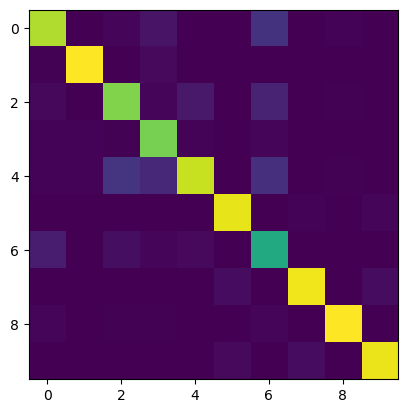

In [146]:
model = Sequential([
    Dense(28*4, input_shape=(28*28,), activation='relu'),
    Dense(28, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train1, epochs=10, batch_size=32)
pred_test = model.predict(xx_test)
res_test = enc.inverse_transform(pred_test).reshape(-1)
confusion_matrix = metrics.confusion_matrix(res_test, y_test)
accuracy = accuracy_score(y_test, res_test)
print(accuracy)
plt.imshow(confusion_matrix)
plt.show()

This was the best configuration we got, we even tried way bigger nns, but the results were not much better. In almost every case, the classifier had the most trouble with category 6, which corresponds to sweaters ? (actually i then checked in the documentation and it's shirts) to be fair, some of the photos for category 6 are quite bad

Also, it is also confused quite a bit with category 3. It could just be that it's truggling to differentiate between these two categories as they are quite similar

6


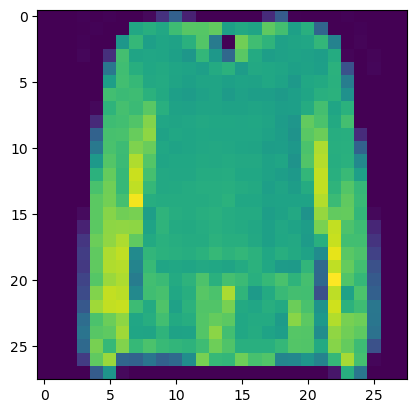

6


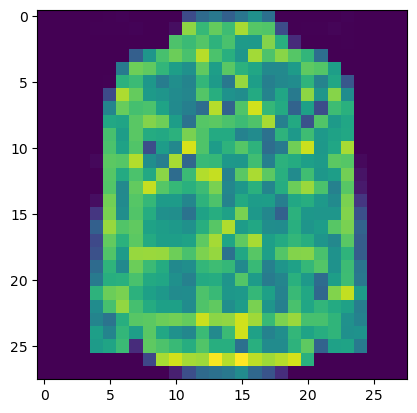

6


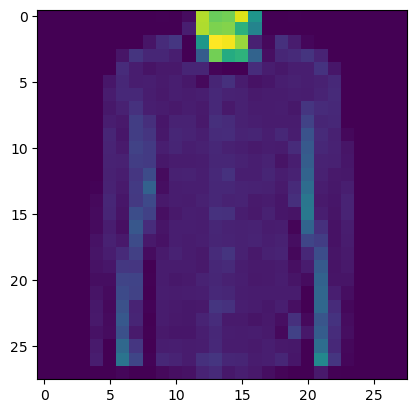

In [178]:
category_6 = np.where(y_train == 6)[0]
for i in range(3):
    plt.imshow(x_train_raw[category_6[i]])
    print(y_train[category_6[i]])
    plt.show()

3


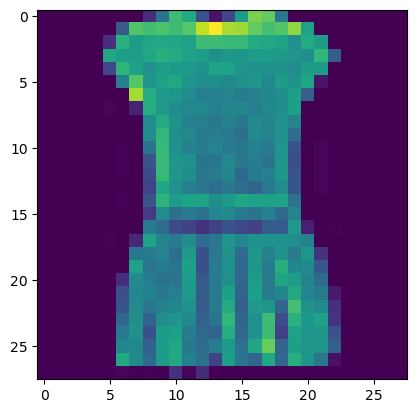

3


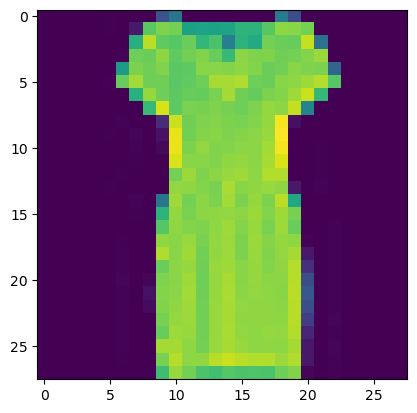

3


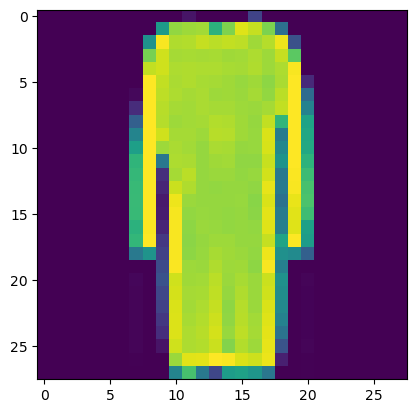

In [ ]:
category_3 = np.where(y_train == 3)[0]
for i in range(3):
    plt.imshow(x_train_raw[category_3[i]])
    print(y_train[category_3[i]])
    plt.show()

much larger model has similar accuracy

c:\Users\grego\miniconda3\envs\ml_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7671 - loss: 0.6601
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8596 - loss: 0.3809
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8746 - loss: 0.3403
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8863 - loss: 0.3126
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8884 - loss: 0.3003
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8918 - loss: 0.2904
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9013 - loss: 0.2659
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9044 - loss: 0.2569
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9078 - loss: 0.2453
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9127 - loss: 0.2329
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
0.8322


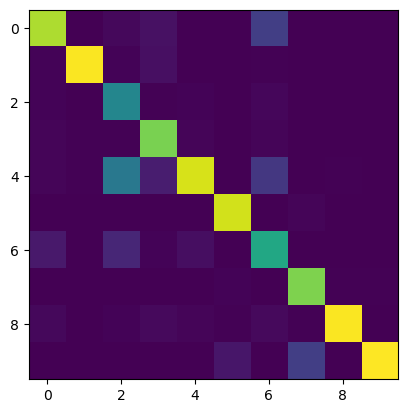

In [104]:
model = Sequential([
    Dense(28*7, input_shape=(28*28,), activation='relu'),
    Dense(28*2, input_shape=(28*28,), activation='relu'),
    Dense(28, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train1, epochs=10, batch_size=32)
pred_test = model.predict(xx_test)
res_test = enc.inverse_transform(pred_test).reshape(-1)
confusion_matrix = metrics.confusion_matrix(res_test, y_test)
accuracy = accuracy_score(y_test, res_test)
print(accuracy)
plt.imshow(confusion_matrix)
plt.show()

In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28), Image.LANCZOS)  # Resize
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize
    img_array = 1 - img_array  # Invert (optional)
    return img_array

In [161]:
# from documentation mnist_fashion
class_names = [
    'T-shirt/top',    # 0
    'Trouser',        # 1
    'Pullover',       # 2
    'Dress',          # 3
    'Coat',           # 4
    'Sandal',         # 5
    'Shirt',          # 6
    'Sneaker',        # 7
    'Bag',            # 8
    'Ankle boot'      # 9
]

In [183]:
true_names = ["sandal", "Trouser", "Trouser", "Dress", "Shirt", "T-shirt", "Shirt", "Pullover", "T-shirt","Sneaker" ] # I classified them myself as I downloaded them

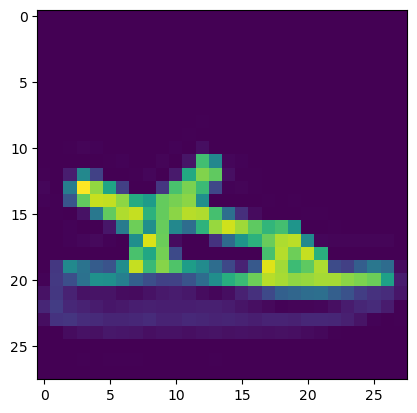

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
model:  Bag
reality:  sandal


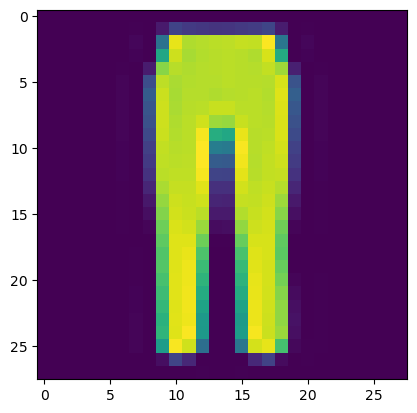

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
model:  Trouser
reality:  Trouser


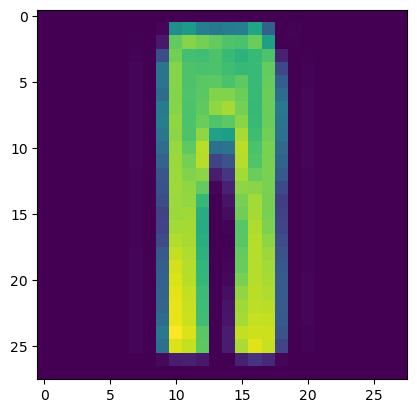

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
model:  Trouser
reality:  Trouser


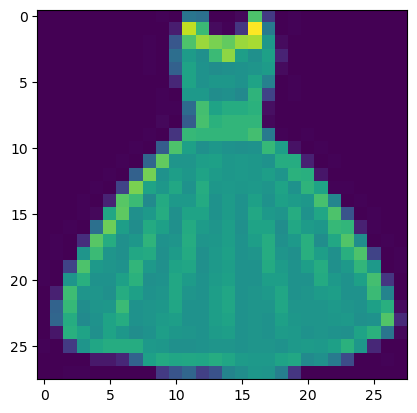

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
model:  Dress
reality:  Dress


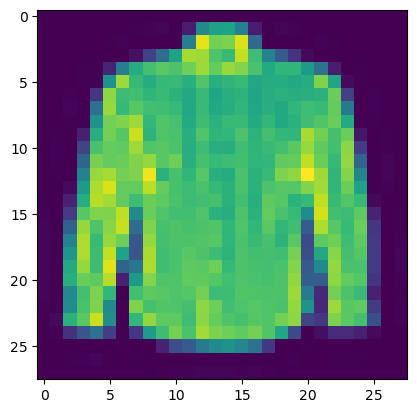

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
model:  Coat
reality:  Shirt


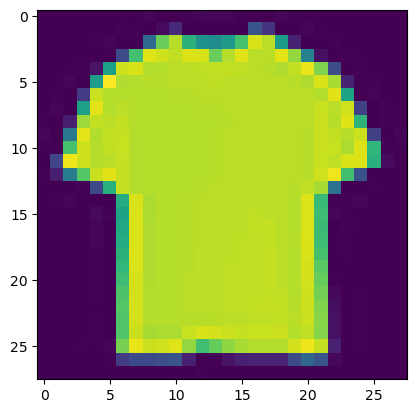

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model:  Shirt
reality:  T-shirt


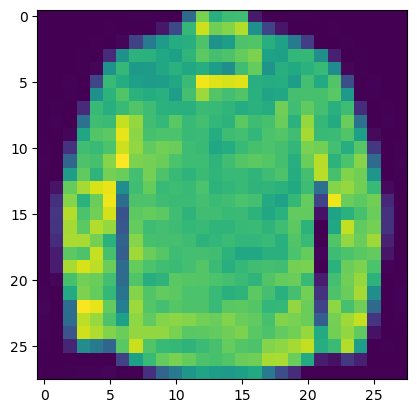

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
model:  Coat
reality:  Shirt


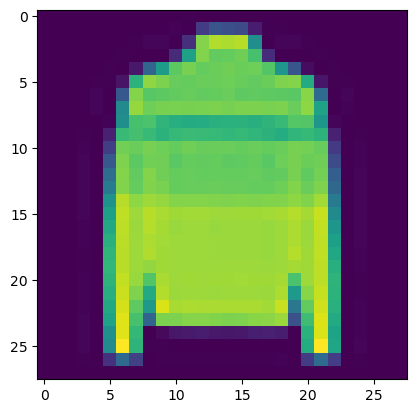

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
model:  Coat
reality:  Pullover


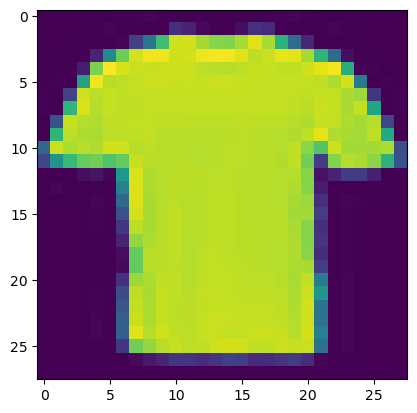

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
model:  T-shirt/top
reality:  T-shirt


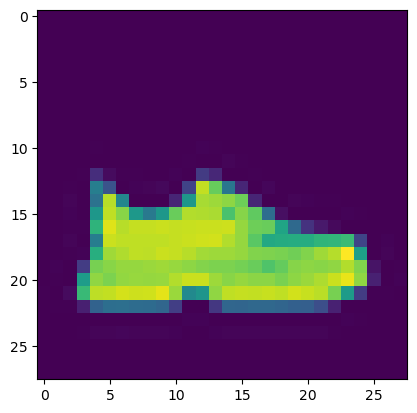

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
model:  Bag
reality:  Sneaker


In [184]:
for i in range(1,11):
    processed_img = preprocess_image(f'./imgs/photo{i}.jpeg')
    plt.imshow(processed_img)
    plt.show()
    x = processed_img.reshape(-1,28*28)
    pred_test = model.predict(x)
    res_test = enc.inverse_transform(pred_test).reshape(-1)
    print("model: ", class_names[res_test[0]])
    print("reality: ", true_names[i-1])
    


It's not so good at classifying shoes, and it often think they are bags, but overall quite good